In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [184]:
data = pd.read_csv("nlp-getting-started/train.csv")
data.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [186]:
from nltk.tokenize import word_tokenize

data["text"] = data["text"].str.lower()
data["tokens"] = data["text"].apply(nltk.word_tokenize)

data.head(5)

,id,keyword,location,text,target,tokens
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,"[our, deeds, are, the, reason, of, this, #, ea..."
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,"[forest, fire, near, la, ronge, sask, ., canada]"
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, 'shelter, in, plac..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #, wildfires, evacua..."
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,"[just, got, sent, this, photo, from, ruby, #, ..."


In [188]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

data["stemmed_tokens"] = data["tokens"].map(lambda y: [stemmer.stem(x) for x in y])

In [189]:
data.head(25)

,id,keyword,location,text,target,tokens,stemmed_tokens
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,"[our, deeds, are, the, reason, of, this, #, ea...","[our, deed, are, the, reason, of, thi, #, eart..."
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, rong, sask, ., canada]"
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, 'shelter, in, plac...","[all, resid, ask, to, 'shelter, in, place, ', ..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #, wildfires, evacua...","[13,000, peopl, receiv, #, wildfir, evacu, ord..."
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,"[just, got, sent, this, photo, from, ruby, #, ...","[just, got, sent, thi, photo, from, rubi, #, a..."
5,8,NaN,NaN,#rockyfire update => california hwy. 20 closed...,1,"[#, rockyfire, update, =, >, california, hwy, ...","[#, rockyfir, updat, =, >, california, hwi, .,..."
6,10,NaN,NaN,#flood #disaster heavy rain causes flash flood...,1,"[#, flood, #, disaster, heavy, rain, causes, f...","[#, flood, #, disast, heavi, rain, caus, flash..."
7,13,NaN,NaN,i'm on top of the hill and i can see a fire in...,1,"[i, 'm, on, top, of, the, hill, and, i, can, s...","[i, 'm, on, top, of, the, hill, and, i, can, s..."
8,14,NaN,NaN,there's an emergency evacuation happening now ...,1,"[there, 's, an, emergency, evacuation, happeni...","[there, 's, an, emerg, evacu, happen, now, in,..."
9,15,NaN,NaN,i'm afraid that the tornado is coming to our a...,1,"[i, 'm, afraid, that, the, tornado, is, coming...","[i, 'm, afraid, that, the, tornado, is, come, ..."


In [192]:
from nltk.corpus import stopwords
from string import punctuation

stopwords = set(stopwords.words('english'))
#print(stopwords)
punctuation = list(punctuation)
punctuation.append(['http', '....', '.....'])

data = data.drop(columns=["text", "tokens"])

for i, token in data["stemmed_tokens"].items():
    for word in token:
        while word in (stopwords and punctuation):
            try:
                token.remove(word)
            except:
                break

            
data.head(5)

,id,keyword,location,target,stemmed_tokens
0,1,NaN,NaN,1,"[our, deed, are, the, reason, of, thi, earthqu..."
1,4,NaN,NaN,1,"[forest, fire, near, la, rong, sask, canada]"
2,5,NaN,NaN,1,"[all, resid, ask, to, 'shelter, in, place, are..."
3,6,NaN,NaN,1,"[13,000, peopl, receiv, wildfir, evacu, order,..."
4,7,NaN,NaN,1,"[just, got, sent, thi, photo, from, rubi, alas..."


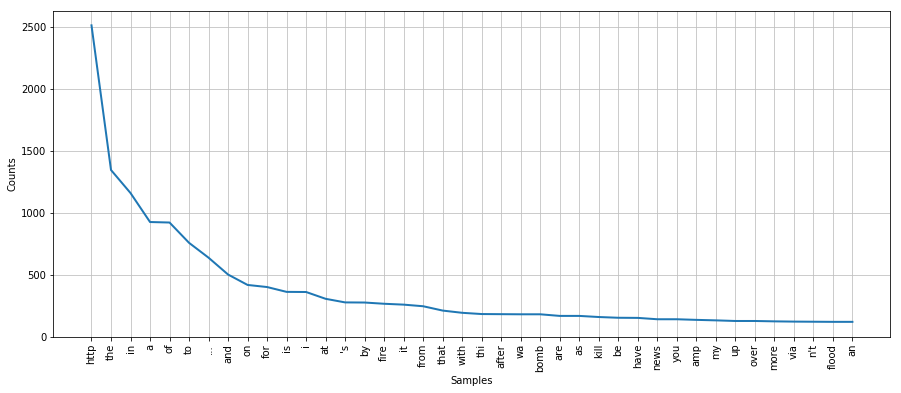

In [195]:
disaster_tweets = []

for i, row in data.iterrows():
    if row["target"] == 1:
        disaster_tweets.append(row["stemmed_tokens"])
        
disaster_tweets = [val for sublist in disaster_tweets for val in sublist]
#print(disaster_tweets)

freq = nltk.FreqDist(disaster_tweets)
plt.figure(figsize=(15,6))
freq.plot(40, cumulative=False)

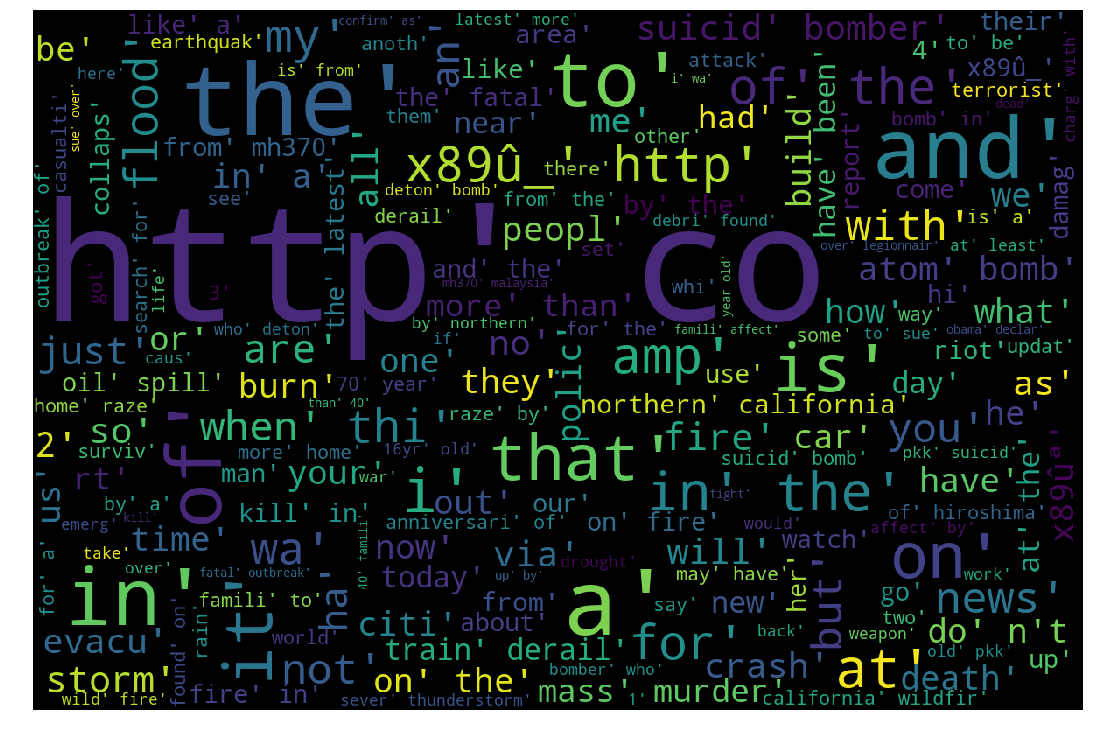

In [197]:
#print(disaster_tweets)

from wordcloud import WordCloud

wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='black',
                min_font_size = 10).generate(str(disaster_tweets)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  